# Clustering

Author: Holly Bok

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Reading in the clean NBA Players csv as 'df'

df = pd.read_csv('datasets/NBAPlayers.csv')

In [3]:
# Dropping all non-numeric columns as well as colunns that directly refer to salary.
# Creating a new DataFrame, 'df_numeric' for input into clustering algorithms

df_numeric = df.drop(columns=['player_name', 'team', 'height', '19_20_salary', 
                             'draft_number_group','future_salary'])

## KMeans

In [4]:
# Scaling data using the Standard Scaler and fitting a KMeans model to the transformed
# data. Printing the silhouette score as well as a list of unique clusters. 

ss = StandardScaler()
df_scaled = ss.fit_transform(df_numeric)

km = KMeans(n_clusters=20) 
km.fit(df_scaled)

print(silhouette_score(df_scaled, km.labels_))
print(set(km.labels_))

# Note: n_clusters of 20 is selected because this number created the highest silhouette
# score of all of the n_clusters values that I tested 

0.19597579973971418
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}


In [5]:
# Creating a new column, 'cluster', that has the cluster assignments for each player
# Observing how many players are assigned to each cluster

df['cluster'] = km.labels_
df['cluster'].value_counts()

16    51
6     44
10    42
2     41
17    31
0     30
1     28
5     27
4     22
11    21
19    19
7     18
14    17
18    15
15    14
8     13
13    11
9     11
12     7
3      5
Name: cluster, dtype: int64

In [6]:
# Saving the updated dataset as 'NBAPlayersClustered.csv' for use in modeling

df.to_csv('datasets/NBAPlayersClustered.csv', index=False)

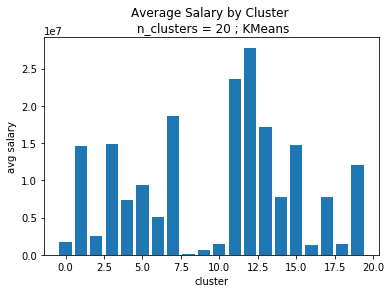

In [7]:
# Visualizing the difference between the average salaries of each cluster

clusters = df.groupby(df['cluster'])['19_20_salary'].mean().sort_values(ascending=False)
plt.bar(x = clusters.index,
        height = df.groupby(df['cluster'])['19_20_salary'].mean().sort_values(
            ascending=False))
plt.title('Average Salary by Cluster \n n_clusters = 20 ; KMeans')
plt.xlabel('cluster')
plt.ylabel('avg salary');

### DBSCAN

The following DBSCAN methods were not able to produce clusters as distinct as the KMeans clustering method above.  The silhouette score and list of clusters is printed for each method.

Note: the epsilon and minimum samples listed for each DBSCAN method were selected based on success through trial and error

In [8]:
# DBSCAN with the entirety of 'df_numeric'

ss = StandardScaler()
df_scaled = ss.fit_transform(df_numeric)
dbscan = DBSCAN(eps=3, min_samples=7)
dbscan.fit(df_scaled)

print(set(dbscan.labels_))
print(silhouette_score(df_scaled, dbscan.labels_))

{0, 1, 2, 3, -1}
0.1564029878225046


In [9]:
# Creating a dataset with random grouping of features for testing with the DBSCAN method

df_test_set = df[['player_id', 'weight', 'points', 'seasons', 'games_started',
                  'minutes_played', 'field_goals_pct_made', '3_pntrs_pct_made',
                  'personal_fouls', 'avg_pnts_per_game', 'heights_inches']]

In [10]:
ss = StandardScaler()
test_set_transformed = ss.fit_transform(df_test_set)
dbscan = DBSCAN(eps=1, min_samples= 5)
dbscan.fit(test_set_transformed)
print(set(dbscan.labels_))
silhouette_score(test_set_transformed, dbscan.labels_)

{0, 1, 2, 3, 4, 5, 6, -1}


-0.07086700602058445

In [11]:
# Creating a dataset with all game-play features for testing with the DBSCAN method

df_stats = df[['seasons', 'points', 'games', 'games_started', 'minutes_played',
       'field_goals_made', '3_pntrs_made', 'field_goals_pct_made',
       '3_pntrs_pct_made', 'ft_pct', 'field_goals_assisted', '3_pntrs_assists',
       'rebounds', 'assists_to_turnovers', 'offensive_rebounds',
       'defensive_rebounds', 'steals', 'blocks', 'turnovers', 'personal_fouls',
       'avg_pnts_per_game', 'pct_of_games_started']]

In [12]:
ss = StandardScaler()
df_stats_transformed = ss.fit_transform(df_stats)
dbscan = DBSCAN(eps=1)
dbscan.fit(df_stats_transformed)
print(set(dbscan.labels_))
print(silhouette_score(df_stats_transformed, dbscan.labels_))

{0, 1, 2, 3, -1}
0.0776143570266231


In [13]:
# Creating a dataset with all highly correlated features for testing with the DBSCAN
# method. Correlation for all features can be found in the '02-EDA' file of this repo

df_high_corr = df[['3_pntrs_assists', 'rebounds', 'personal_fouls', 'games',
                  'defensive_rebounds', 'pct_of_games_started', 'assists_to_turnovers',
                  'steals', 'minutes_played', 'turnovers', 'games_started', 
                  'field_goals_assisted', 'field_goals_made', 'avg_pnts_per_game',
                  'points']]

In [14]:
ss = StandardScaler()
df_high_corr_transformed = ss.fit_transform(df_high_corr)
dbscan = DBSCAN(eps=.5, min_samples=5)
dbscan.fit(df_high_corr_transformed)
print(set(dbscan.labels_))
print(silhouette_score(df_high_corr_transformed, dbscan.labels_))

{0, 1, 2, -1}
0.109132032501988


In [15]:
# Creating a dataset with a small set of features for testing with the DBSCAN method

df_small = df[['3_pntrs_assists', 'rebounds', 'personal_fouls', 'games',
                  'defensive_rebounds', 'assists_to_turnovers',
                  'steals', 'minutes_played', 'turnovers', 'games_started', 
                  'field_goals_assisted', 'field_goals_made',
                  'points']]

In [16]:
ss = StandardScaler()
df_small_transformed = ss.fit_transform(df_small)
dbscan = DBSCAN(eps=.5, min_samples=3)
dbscan.fit(df_small_transformed)
print(set(dbscan.labels_))
print(silhouette_score(df_high_corr_transformed, dbscan.labels_))

{0, 1, 2, -1}
0.08037002638967645
